# Silicon Band Gap Energy

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
# We will use the scipy curve_fit function to fit a model to data.
from scipy.optimize import curve_fit

Enter data from table as numpy arrays

In [2]:
t_cel = np.array([-15., -10., -8., -6., -4.2, -2.3, 0., 2., 
                3.6, 5.8, 8.2, 10., 12.8, 16.2, 20.])
adu = np.array([13, 15, 16, 17, 19, 22, 24, 28, 32, 37, 
                43, 50, 62, 89, 139])

Convert Celsius to Kelvin

In [4]:
t_kel = (t_cel + 273)
t_kel

array([258. , 263. , 265. , 267. , 268.8, 270.7, 273. , 275. , 276.6,
       278.8, 281.2, 283. , 285.8, 289.2, 293. ])

Convert ADU (counts) to electrons

In [5]:
electrons = adu*2.3
electrons

array([ 29.9,  34.5,  36.8,  39.1,  43.7,  50.6,  55.2,  64.4,  73.6,
        85.1,  98.9, 115. , 142.6, 204.7, 319.7])

Convert electrons to electrons per second

In [6]:
electrons_per_sec = electrons/120
electrons_per_sec

array([0.24916667, 0.2875    , 0.30666667, 0.32583333, 0.36416667,
       0.42166667, 0.46      , 0.53666667, 0.61333333, 0.70916667,
       0.82416667, 0.95833333, 1.18833333, 1.70583333, 2.66416667])

## Plot dark current (e-/sec) vs. inverse temperature
Make a plot in the cell below

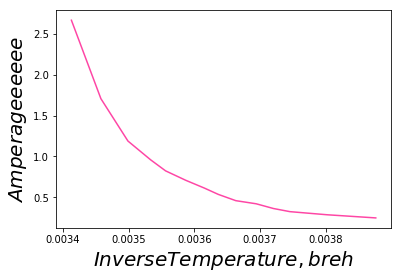

In [36]:
[# plots the current as a function of inverse temperature.
fig,ax = plt.subplots(1,1)
ax.set_xlabel("InverseTemperature, breh", fontsize=20)
ax.set_ylabel("Amperageeeeee", fontsize=20)
ax.plot(1/t_kel, electrons_per_sec, alpha=1.0, color='xkcd:barbie pink')
fig.savefig('ccd_lab_fig1.png', bbox_inches='tight');

## Fit for the band gap energy
We will try to fit a model for dark current of the form

$D = \alpha e^{-e_g/2k_bT}$

In [8]:
# The Boltzmann constant

k_B = 8.6175*10**(-5)

def dark_current(t_k, alpha, e_g):
    """
    Analytic expression for dark current as a function of temperature.
    
    Parameters
    ----------
    t_k : numpy.ndarray
        Temperature in Kelvin
    alpha : float
        Constant coefficient in front of exponential funtion.
    e_g : float
        Band gap energy in eV.
    
    Returns
    -------
    dark_current : numpy.ndarray
        Dark current in electrons/pixel/second.
    """
    dark_current = alpha * np.exp(-e_g / (2 * k_B * t_k))
    return dark_current

## Inital guesses for parameters
We need initial guesses for the values of $\alpha$ and $e_g$.

In [9]:
t_0 = t_kel[-1]
d_0 = electrons_per_sec[-1]

alpha_0 =  d_0 / np.exp(-1.1 / (2 * k_B * t_0))
e_g_0 = 1.1

## Least squares fit

In [10]:
p_opt, p_cov = curve_fit(dark_current, t_kel, electrons_per_sec, p0=[alpha_0, e_g_0])

# Errors in the fit
sig_alpha, sig_e_g = np.sqrt(np.diag(p_cov))

## Best fit values

In [11]:
alpha_fit, e_g_fit = p_opt
print(alpha_fit)
print(e_g_fit)

76088093374.73071
1.2192320164305093


## Plot the data and best fit model

Make a plot in the cell below. To plot the model, use the `dark_current` function with `alpha_fit` and `e_g_fit`.

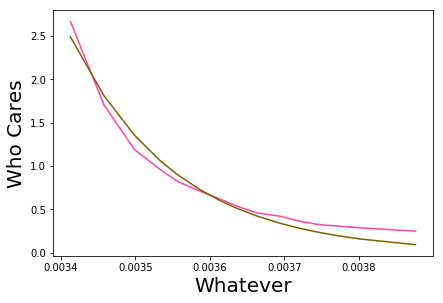

In [46]:
fig,ax = plt.subplots(1,1)
fig.tight_layout()
# plotting model versus data
ax.plot(1/t_kel, electrons_per_sec, alpha=1.0, color='xkcd:barbie pink')
ax.plot(1/t_kel, dark_current(t_kel, alpha_fit, e_g_fit), alpha=1.0, color='xkcd:shit')
ax.set_xlabel("Whatever", fontsize=20)
ax.set_ylabel("Who Cares", fontsize=20)
fig.savefig('ccd_lab_fig2.png', bbox_inches='tight');